檔案網址
https://www.superdatascience.com/machine-learning/

kernel介紹：
http://mlkernels.readthedocs.io/en/latest/interface.html

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #pyplot是次libraries
from os import listdir
from os.path import isfile,isdir,join
from os import walk


In [9]:
mypath = "Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM"
files = listdir(mypath)

# 遞迴列出所有子目錄與檔案
for root, dirs, files in walk(mypath):#找出資料夾內容
  print("路徑：", root)
  print("  目錄：", dirs)
  print("  檔案：", files)

for root, dirs, files in walk(mypath): #讀取絕對路徑
  for f in files:
    fullpath = join(root, f)
    print(fullpath)

路徑： Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM
  目錄： []
  檔案： ['.DS_Store', 'classification_template.py', 'classification_template.R', 'kernel_svm.py', 'kernel_svm.R', 'Social_Network_Ads.csv']
Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM/.DS_Store
Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM/classification_template.py
Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM/classification_template.R
Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM/kernel_svm.py
Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM/kernel_svm.R
Machine Learning A-Z Template Folder/Part 3 - Classification/Section 17 - Kernel SVM/Kernel_SVM/Social_Network_Ads.csv


In [10]:
datapath= mypath + '/'+ 'Social_Network_Ads.csv' #可列出資料位置
testdata = pd.read_csv(datapath)

In [11]:
testdata 


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [12]:
x = testdata.iloc[:, [2,3]].values 
#要比較年齡及收入跟購買與否的關係
y = testdata.iloc[:, 4].values

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1,

In [14]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
#feature scaling 因為要用年齡跟薪水一起預測，所以要讓兩者的組聚一樣
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
#如果沒設定kernel ，就會是非線性的
#rbf是三維分法
#非線性的比較準確
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred = classifier.predict(X_test)

In [36]:
# making the confusion Matrix 可看出正確與錯誤的部分 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm
#有3+4個錯-->7個預估錯誤

array([[64,  4],
       [ 3, 29]])

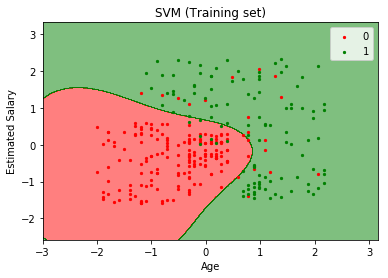

In [39]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i),s =5, label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

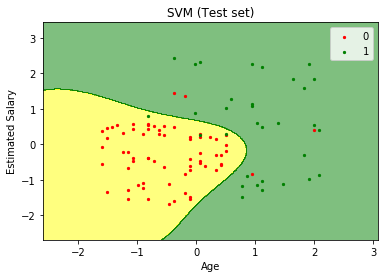

In [40]:
# Visualising the Test set results
#黃色不會買-->年紀小且薪水低
#綠色會買-->年紀大且薪水高
#黃、綠是預測，點是實際值
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), s = 5,label = j)
#c 表示散点的颜色，指定一个颜色或者色序。s 表示散点的大小
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

問題點：
要怎麼用？
在哪裡輸入資料來讓他測試？
用test data當成輸入來源？

In [23]:
SVC?